In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer as WNL
import scipy
from IPython.display import clear_output as clr
%matplotlib inline

In [2]:
# Defining data directory
data_dir = os.getcwd() + '/../'
# Check in contents of current dir are same as expected
os.listdir(data_dir)

['.ipynb_checkpoints',
 '20news-18828.tar.gz',
 'corpuses',
 'LDA',
 'NMF',
 'stackoverflow-data-idf.json',
 'stackoverflow-test.json',
 'TF-IDF',
 'train_corpus',
 'Unigram']

In [3]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer as WNL

In [4]:
class preprocessor:
    
    def __init__(self):
        # word lemmatizer
        self.articles = 'a|an|and|the'
        self.lemmatizer = WNL()
        self.punctuations = string.punctuation
        self.translator = str.maketrans(string.punctuation, ' '*len(self.punctuations))
        
    def normalize_text(self, s):
        lower_s = self.lower(s)
        rem_p_s = self.remove_punc(lower_s)
        rem_a_s = self.remove_articles(rem_p_s)
        space_s = self.white_space_fix(rem_a_s)
        lemma_s = self.lemmatize(space_s)
        return lemma_s
        
    def lemmatize(self, txt):
        lemmatizer = self.lemmatizer
        return ' '.join(lemmatizer.lemmatize(lemmatizer.lemmatize(word, pos = 'v'), pos = 'a') for word in txt.split())

    def remove_articles(self, text):
        return re.sub('\s+('+self.articles+')(\s+)', ' ',text)

    def white_space_fix(self, text):
        return ' '.join(text.split())

    def remove_punc(self, text):
        return text.translate(self.translator)

    def lower(self, text):
        return text.lower()

In [5]:
processor = preprocessor()

In [69]:
from nltk.corpus import brown
 
data = []
 
for fileid in brown.fileids():
    document = ' '.join(brown.words(fileid))
    data.append(processor.normalize_text(document))
    if(len(data) >= 10):
        break

In [70]:
class vocab:
    
    def __init__(self, corpus):
        """
        Corpus : list of docs
        """
        self.dictionary = {}
        self.vocab_size = 0
        self.make_vocab(corpus)
        self.inv_dictionary = {v: k for k, v in self.dictionary.items()}
    
    def make_vocab(self,corpus):
        
        count = 0
        for doc in corpus:
            for word in doc.strip().split():
                if(word in self.dictionary.keys()):
                    pass
                else:
                    self.dictionary[word] = count
                    count += 1
        
        self.vocab_size = count
        assert(len(self.dictionary.keys()) == count), "Wrong Number of words added"
        
    def get_index(self,word):
        if(word in self.dictionary.keys()):
            return self.dictionary[word]
        else:
            return -1
    
    def get_word(self,index):
        if(index in self.inv_dictionary.keys()):
            return self.inv_dictionary[index]
        else:
            return " "

In [71]:
myDict = vocab(data)

In [72]:
myDict.vocab_size

3446

In [73]:
def make_mat(corpus, vocab):
    
    D = len(corpus)
    V = vocab.vocab_size
    mat = np.zeros((V, D))
    for i in range(len(corpus)):
        doc = corpus[i]
        for word in doc.strip().split(" "):
            index = vocab.get_index(word)
            mat[index,i] += 1
    return mat

In [74]:
X = make_mat(data, myDict)

In [75]:
X.shape

(3446, 10)

In [598]:
def NMF(X, k, Winit = None, Hinit = None, convex = True, max_iter = None, pprint = False):    
    V, D = X.shape
    eps = 0.0001
    diff = 10
    c_iter = 0
    
    if(max_iter is None):
        max_iter  = 100
    
    if(Winit is None):
        W = np.random.rand(V, k)
        H = np.random.rand(k, D)
    else:
        W = Winit
        H = Hinit

        
    while(diff > eps and c_iter < max_iter):
        c_iter+=1
    
        var = (X - np.dot(W, H))
        if(convex):
            H = H/np.sum(H, axis =1).reshape(-1,1)
        W = W*(np.dot(X,H.T)/np.dot(W,np.dot(H, H.T)))
        H = H*(np.dot(W.T,X)/np.dot(W.T,np.dot(W,H)))
        
        diff = np.sum(np.square(var))
        if(c_iter%100 == 0 and pprint):
            print(diff)
    return W, H

In [599]:
W, H = NMF(X, 5, pprint = True, convex = False, max_iter = 5000)

18516.4918037627
17936.748909931386
17779.24611580666
17733.52649756182
17704.094165221868
17687.0477214625
17668.024143395356
17659.571413635796
17657.010542874243
17655.491227673498
17654.693414080324
17653.493101667762
17653.13135921922
17652.76155800232
17652.49438555885
17652.30819805387
17652.160860154905
17652.0582490123
17651.368435623914
17651.13361772854
17650.63684341432
17650.545106637153
17650.46097609847
17650.4039319881
17650.359803160107
17650.345839137106
17650.33587196523
17650.326522814834
17650.31436398202
17650.30440047054
17650.297779992987
17650.29025529925
17650.279400479554
17650.271800104172
17650.26821232146
17650.26626141355
17650.264585166085
17650.263126265323
17650.2597255923
17650.25696687814
17650.25589971725
17650.253850276546
17650.251336880883
17650.24859385435
17650.247822776055
17650.24719612964
17650.246645346928
17650.244935276376
17650.24347072909
17650.243052698905


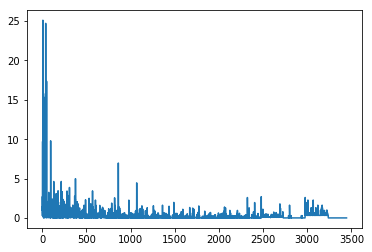

In [114]:
plt.plot(W[:,1])

In [119]:
indices = np.argsort(W[:,3])[0:10]

In [120]:
for i in indices:
    print(myDict.get_word(i))

whole
dependent
ribbon
forbid
employment
discrimination
racial
strickland
chester
supt


In [693]:
def GaP(F, K,a,b, Winit = None, Hinit = None, convex = True, max_iter = None, pprint = False):    
    
    V, D = F.shape
    epsi = 10e-5
    eps = 0.0001
    diff = 10
    c_iter = 0
    
    if(max_iter is None):
        max_iter  = 100
    
    if(Winit is None):
        L = np.random.rand(V, K)+0.1
        X = np.random.rand(K, D)+0.1
    else:
        L = Winit
        X = Hinit

        
    while(diff > eps and c_iter < max_iter):
        
        c_iter+=1
        
        Y = np.dot(L, X)
        FbyY = F/(Y + epsi) # V x D

        diff = np.sum(np.square(F - Y))
        # E step 
        denominator = np.sum(L, axis = 0) + 1/b  + epsi## K x 1
        
        
        for kv in range(D):
            p1 = np.sum(FbyY[:,kv].reshape(-1,1)*L, axis = 0)
            X_kv = X[:,kv]
            X[:,kv] *= (p1 + (a-1)/(X_kv + epsi))/(denominator)
            
        # M step
        
        denominator = np.sum(X, axis = 1)## K x 1
        numerator = np.dot(FbyY, X.T) ## V x K
        
        
        L *= (numerator/(denominator + epsi))
    
        if(c_iter%1000 == 0 and pprint):
            print(diff)
    return L, X

In [694]:
K = 5
a = np.random.rand(K)+1
b = np.random.rand(K)

In [696]:
W, H = GaP(X, K,a,b, pprint = True, convex = False, max_iter = 20000)

112078.33209790789
101019.43389547874
92271.44525030992
84625.4156158772
77759.09358177126
71549.03362199155
65931.80086471868
60862.45848059574
56302.33585541582
52214.85098410531
48564.193830797165
45315.127944028194
42433.21458706433
39885.15665740598
37639.12926788958
35665.04366157384
33934.729908806745
32422.04213449279
31102.897649840892
29955.263453679094
28959.10295402047
28096.29401607628
27350.52740725562
26707.192793725517
26153.257810128754
25677.144404792052
25268.60562729888
24918.605220707315
24619.201754064467
24363.438537602862
24145.24016933217
23959.316243843652
23801.072496291665
23666.529445896653
23552.248436679212
23455.264843303572
23373.028112059077
23303.348237423514
23244.348229051084
23194.42209892646
23152.197889872496
23116.50527139338
23086.347243735778
23060.87551337688
23039.369130475407
23021.216009256925
23005.89698425605
22992.972087501803
22982.06876327921
22972.871767261106
22965.114525233057
22958.57175293359
22953.053162649576
22948.398104078482

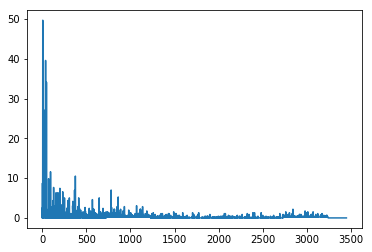

In [702]:
plt.plot(W[:,0])

In [711]:
indices = np.argsort(W[:,4])[0:10]

In [712]:
for i in indices:
    print(myDict.get_word(i))

whole
pool
resources
victory
original
screw
1955
us
gross
product
